<a href="https://colab.research.google.com/github/KollessIsopod/deep_learning/blob/main/proj_R_Siciliano_SL_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images_og, train_labels), (test_images_og, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


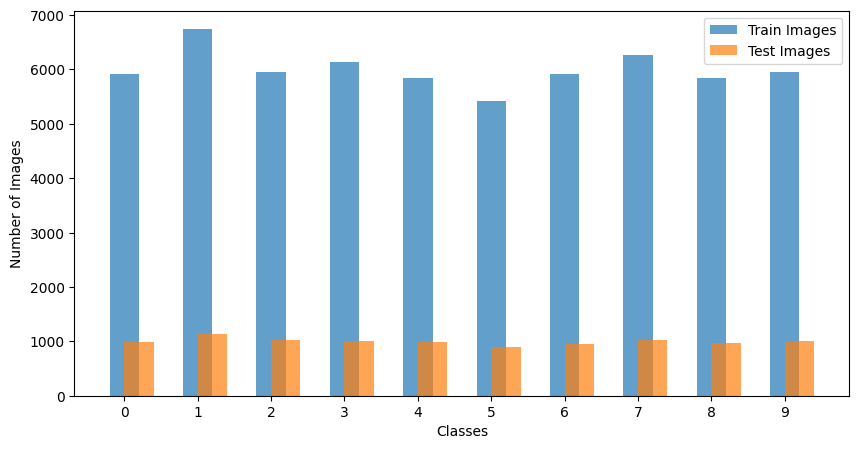

In [ ]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

train_counts = np.bincount(train_labels.flatten())
test_counts = np.bincount(test_labels.flatten())

plt.figure(figsize=(10, 5))
plt.bar(range(len(classes)), train_counts, width=0.4, align='center', alpha=0.7, label='Train Images')
plt.bar(range(len(classes)), test_counts, width=0.4, align='edge', alpha=0.7, label='Test Images')
plt.xticks(range(len(classes)), classes)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.legend()
plt.show()

In [ ]:
smallest_value = np.min(train_images_og)
largest_value = np.max(train_images_og)

print("Smallest value:", smallest_value)
print("Largest value:", largest_value)    #normalization

train_images = tf.keras.utils.normalize(train_images_og, axis=-1)
test_images = tf.keras.utils.normalize(test_images_og, axis=-1)

smallest_value = np.min(train_images)
largest_value = np.max(train_images)

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

print("Shape of train_images", train_images.shape)

print("Smallest value:", smallest_value)
print("Largest value:", largest_value)

Smallest value: 0
Largest value: 255
Shape of train_images (60000, 28, 28, 1)
Smallest value: 0.0
Largest value: 1.0


In [ ]:
model_noreg = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(30, 3, padding='same', input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(60, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),   #activation allows us to recognize more complex/nonlinear patterns
    tf.keras.layers.Dense(10, activation='softmax'),
])
# | || |ı |_
model_noreg.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(), #loss function: an instrument of calculation to check how close we are to the true value
                    metrics=['accuracy'])

In [ ]:
history_noreg = model_noreg.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 19s 4ms/step - loss: 0.1495 - accuracy: 0.9534 - val_loss: 0.0494 - val_accuracy: 0.9840
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.0396 - val_accuracy: 0.9869
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0383 - val_accuracy: 0.9876
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.0523 - val_accuracy: 0.9851
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0384 - val_accuracy: 0.9891
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0137 - accuracy: 0.9957 - val_loss: 0.0340 - val_accuracy: 0.9898
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.0510 - val_accuracy

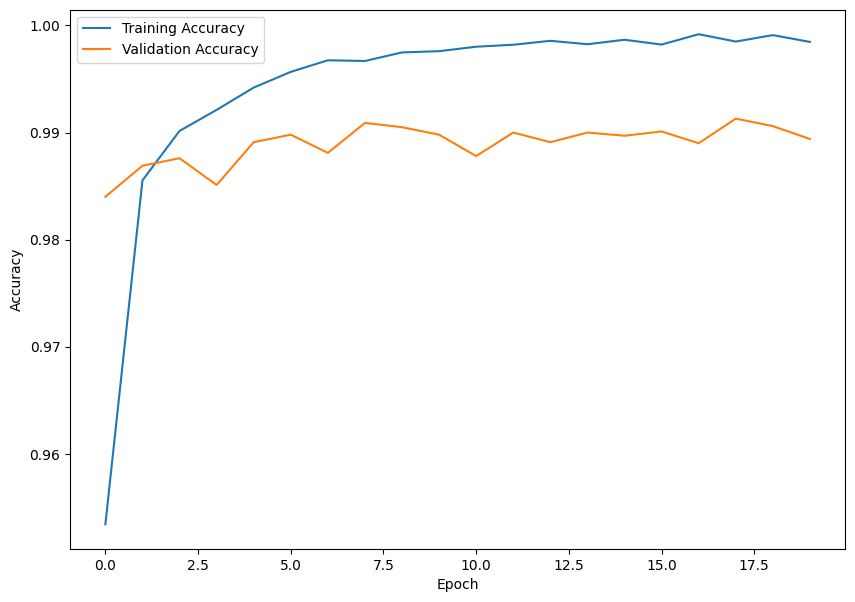

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(history_noreg.history['accuracy'], label='Training Accuracy')
plt.plot(history_noreg.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

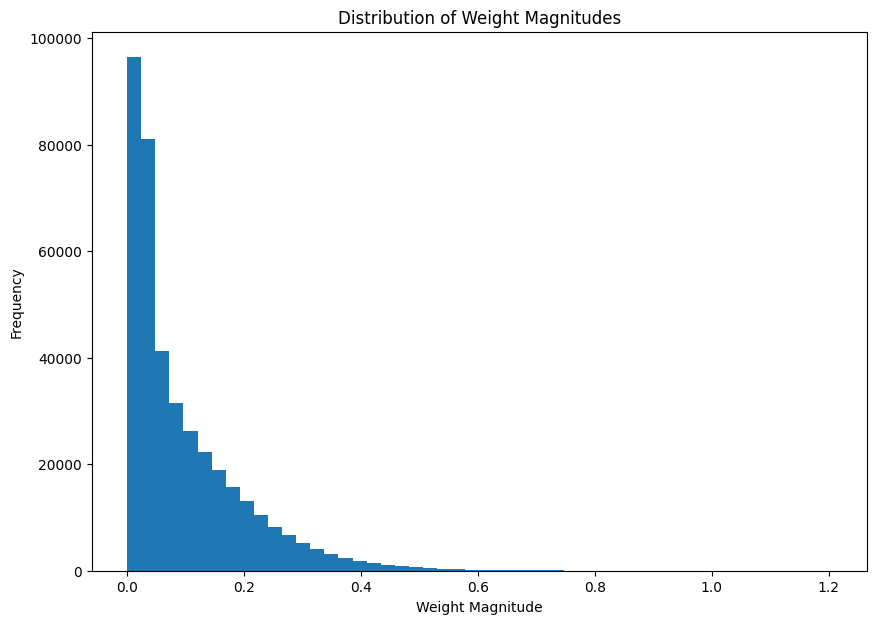

In [ ]:
weight_magnitudes = []

for layer in model_noreg.layers:
    layer_weights = layer.get_weights()

    for weight in layer_weights:
        weight_magnitudes.extend(np.abs(weight).flatten())

plt.figure(figsize=(10, 7))
plt.hist(weight_magnitudes, bins=50)
plt.xlabel('Weight Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Weight Magnitudes')
plt.show()

1/1 [==============================] - 0s 141ms/step
Predicted class: 6
Correct class: 6


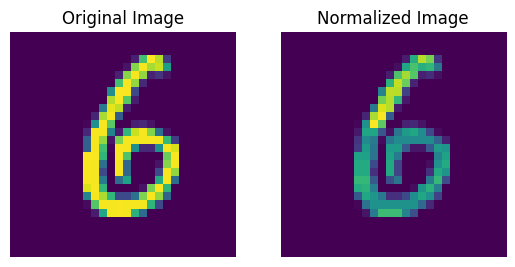

In [ ]:
# Select a random index from the training data
random_index = np.random.randint(0, len(test_images))

image = test_images[random_index]
image_og = test_images_og[random_index]
label = test_labels[random_index]

image = np.expand_dims(image, axis=0)

prediction = model_noreg.predict(image)
predicted_class = np.argmax(prediction)

predicted_class_name = classes[predicted_class]
correct_class_name = classes[int(label)]

print("Predicted class:", predicted_class_name)
print("Correct class:", correct_class_name)

plt.subplot(1, 2, 1)
plt.imshow(image_og.squeeze())
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image.squeeze())
plt.title("Normalized Image")
plt.axis('off')

plt.show()

In [ ]:
model_L1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(30, 3, padding='same', input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(60, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001)),
    tf.keras.layers.Dense(10, activation='softmax'),
])       #after multiplying by weight and adding bias, substract by total amount of weights times a certain value (0.001 in this case)
         #since activation function removes negative values, this helps reduce total weight

model_L1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history_L1 = model_L1.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6498 - accuracy: 0.9205 - val_loss: 0.3441 - val_accuracy: 0.9649
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3160 - accuracy: 0.9638 - val_loss: 0.2647 - val_accuracy: 0.9738
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2685 - accuracy: 0.9694 - val_loss: 0.2285 - val_accuracy: 0.9793
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2445 - accuracy: 0.9725 - val_loss: 0.2120 - val_accuracy: 0.9787
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2298 - accuracy: 0.9741 - val_loss: 0.2115 - val_accuracy: 0.9792
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2223 - accuracy: 0.9760 - val_loss: 0.1996 - val_accuracy: 0.9799
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2122 - accuracy: 0.9766 - val_loss: 0.1980 - val_accuracy

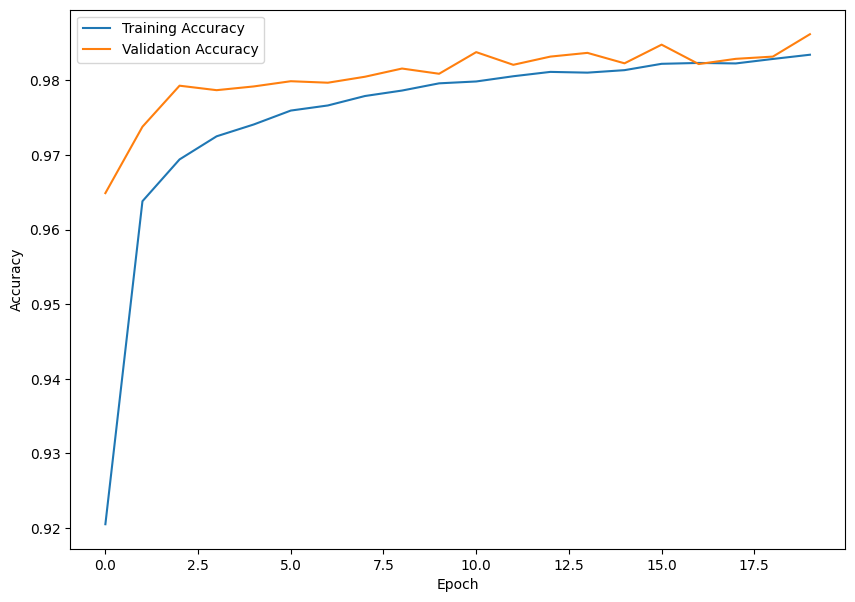

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(history_L1.history['accuracy'], label='Training Accuracy')
plt.plot(history_L1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

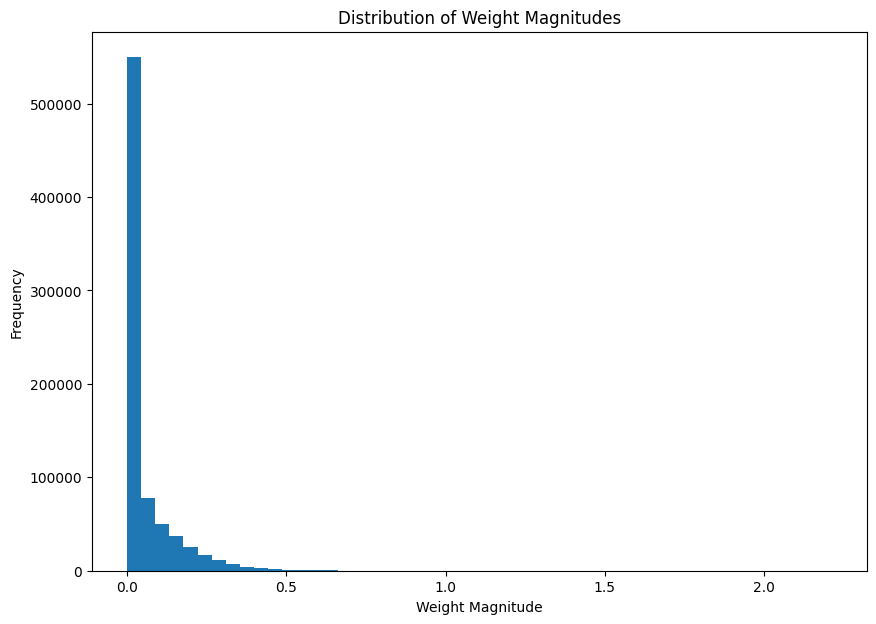

In [ ]:
for layer in model_L1.layers:
    layer_weights = layer.get_weights()

    for weight in layer_weights:
        weight_magnitudes.extend(np.abs(weight).flatten())

plt.figure(figsize=(10, 7))
plt.hist(weight_magnitudes, bins=50)
plt.xlabel('Weight Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Weight Magnitudes')
plt.show()

In [ ]:
model_L2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(30, 3, padding='same', input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(60, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax'),
])
     #conceptually same with L1, but calculation is done with the squares for substraction. So lower values of weights are less likely
     #to cause activation functions to delete, however higher valued weight are more likely to be deleted or reduced to a minimal point.

model_L2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history_L2 = model_L2.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.3735 - accuracy: 0.9352 - val_loss: 0.2384 - val_accuracy: 0.9615
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2142 - accuracy: 0.9644 - val_loss: 0.1946 - val_accuracy: 0.9678
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1787 - accuracy: 0.9711 - val_loss: 0.1636 - val_accuracy: 0.9716
Epoch 4/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1602 - accuracy: 0.9746 - val_loss: 0.1625 - val_accuracy: 0.9740
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1464 - accuracy: 0.9762 - val_loss: 0.1280 - val_accuracy: 0.9791
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1356 - accuracy: 0.9784 - val_loss: 0.1241 - val_accuracy: 0.9822
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1273 - accuracy: 0.9794 - val_loss: 0.1129 - val_accuracy

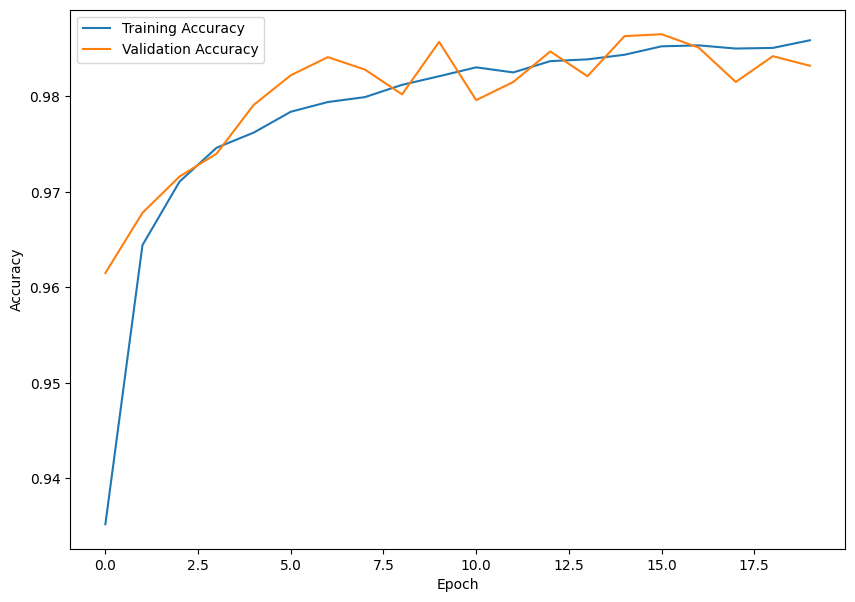

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(history_L2.history['accuracy'], label='Training Accuracy')
plt.plot(history_L2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

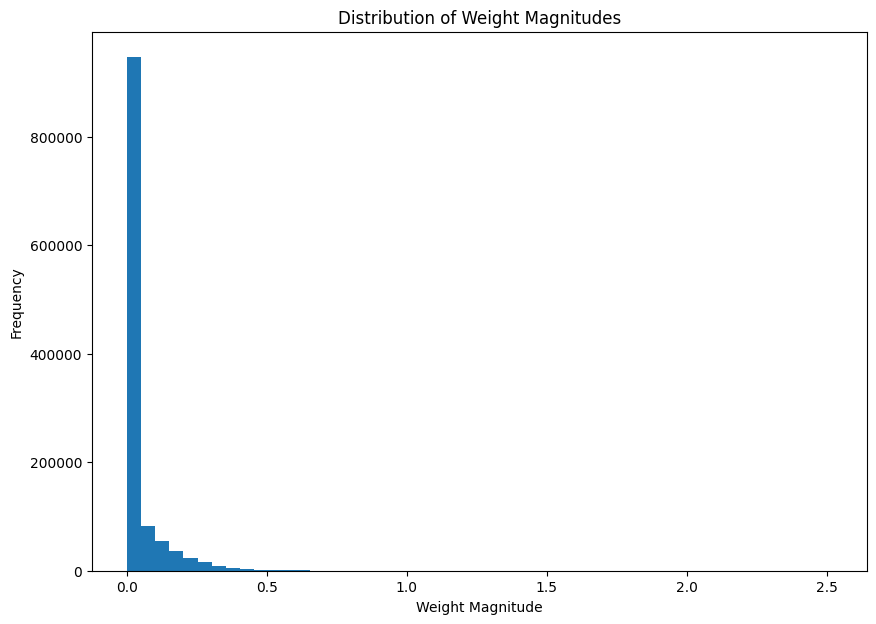

In [ ]:
for layer in model_L2.layers:
    layer_weights = layer.get_weights()

    for weight in layer_weights:
        weight_magnitudes.extend(np.abs(weight).flatten())

plt.figure(figsize=(10, 7))
plt.hist(weight_magnitudes, bins=50)
plt.xlabel('Weight Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Weight Magnitudes')
plt.show()

In [ ]:
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False
)

augmented_train_data = data_augmentation.flow(train_images, train_labels, batch_size=32)

model_aug = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(30, 3, padding='same', input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(60, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
history_aug = model_aug.fit(augmented_train_data, epochs=20, validation_data=(test_images, test_labels), callbacks=[early_stopping])

Epoch 1/20
1875/1875 [==============================] - 28s 13ms/step - loss: 0.8649 - accuracy: 0.8152 - val_loss: 0.4245 - val_accuracy: 0.9445
Epoch 2/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5174 - accuracy: 0.9075 - val_loss: 0.3584 - val_accuracy: 0.9518
Epoch 3/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.4422 - accuracy: 0.9243 - val_loss: 0.3435 - val_accuracy: 0.9516
Epoch 4/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3900 - accuracy: 0.9345 - val_loss: 0.2822 - val_accuracy: 0.9653
Epoch 5/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3560 - accuracy: 0.9414 - val_loss: 0.2744 - val_accuracy: 0.9597
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3376 - accuracy: 0.9428 - val_loss: 0.2460 - val_accuracy: 0.9684
Epoch 7/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3220 - accuracy: 0.9461 - val_loss: 0.2432 -

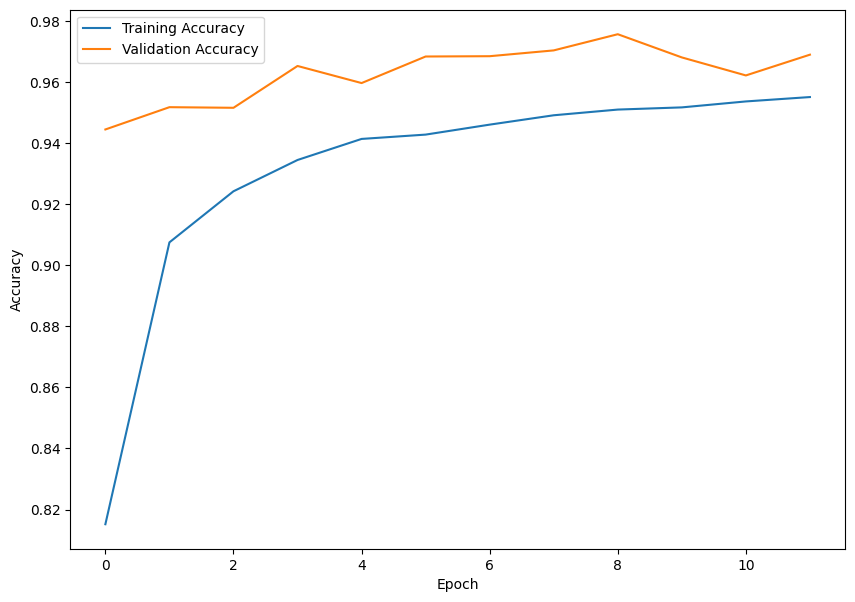

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(history_aug.history['accuracy'], label='Training Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

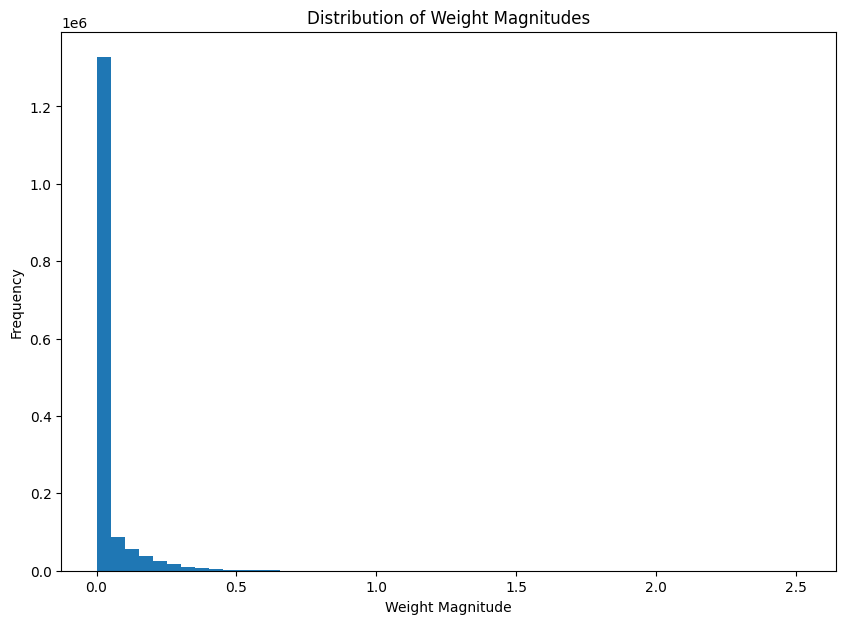

In [ ]:
for layer in model_aug.layers:
    layer_weights = layer.get_weights()

    for weight in layer_weights:
        weight_magnitudes.extend(np.abs(weight).flatten())

plt.figure(figsize=(10, 7))
plt.hist(weight_magnitudes, bins=50)
plt.xlabel('Weight Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Weight Magnitudes')
plt.show()

In [ ]:
model_dropout = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(30, 5, padding='same', input_shape=(28, 28, 1), activation='relu'), #I changed 3x3 convolution square to 5x5.
    tf.keras.layers.MaxPooling2D(),     #this causes to look at a bigger picture. This way, instead of smaller patterns, bigger patterns
    tf.keras.layers.Conv2D(60, 5, padding='same', activation='relu'), #carry more importance. And since we are just looking at 28x28 number images,
    tf.keras.layers.MaxPooling2D(), #this actually helped me improve our accuracy. However it would decrease accuracy in a model where smaller patterns
    tf.keras.layers.Flatten(),  #carry more importance, such as identifying species of flowers of the same family. Depends on the model.
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001)),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_dropout.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [ ]:
history_dropout = model_dropout.fit(train_images, train_labels, epochs=75, validation_data=(test_images, test_labels), callbacks=[early_stopping])

Epoch 1/75
1875/1875 [==============================] - 12s 5ms/step - loss: 0.4362 - accuracy: 0.9340 - val_loss: 0.2416 - val_accuracy: 0.9750
Epoch 2/75
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2637 - accuracy: 0.9644 - val_loss: 0.1933 - val_accuracy: 0.9809
Epoch 3/75
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2279 - accuracy: 0.9704 - val_loss: 0.1757 - val_accuracy: 0.9796
Epoch 4/75
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1992 - accuracy: 0.9741 - val_loss: 0.1683 - val_accuracy: 0.9833
Epoch 5/75
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1809 - accuracy: 0.9761 - val_loss: 0.1370 - val_accuracy: 0.9865
Epoch 6/75
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1690 - accuracy: 0.9783 - val_loss: 0.1464 - val_accuracy: 0.9847
Epoch 7/75
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1564 - accuracy: 0.9795 - val_loss: 0.1177 - val_accura

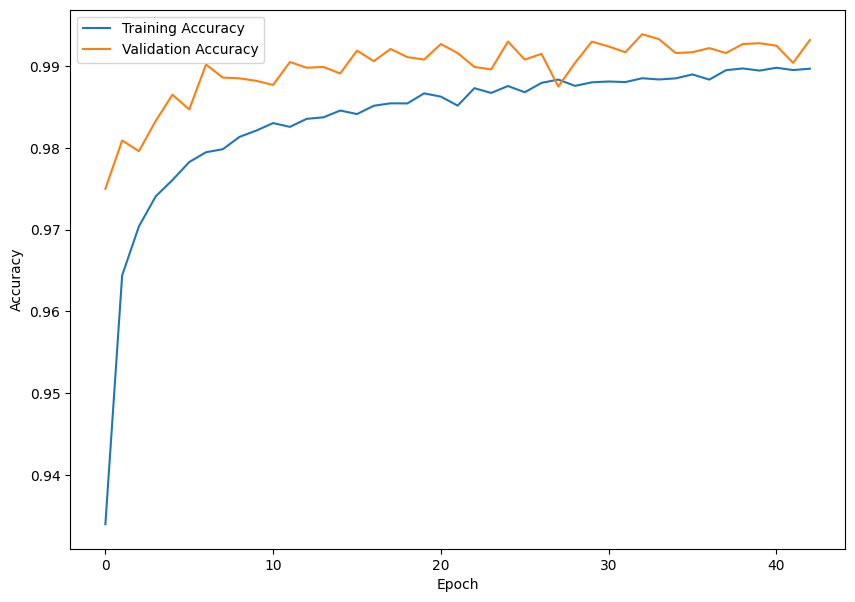

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

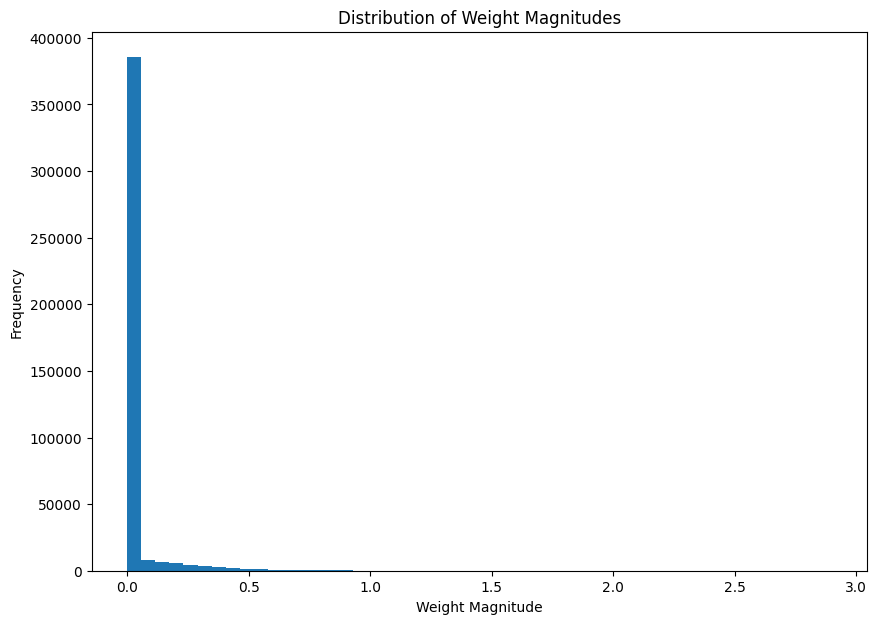

In [ ]:
weight_magnitudes = []

for layer in model_dropout.layers:
    layer_weights = layer.get_weights()

    for weight in layer_weights:
        weight_magnitudes.extend(np.abs(weight).flatten())

plt.figure(figsize=(10, 7))
plt.hist(weight_magnitudes, bins=50)
plt.xlabel('Weight Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Weight Magnitudes')
plt.show()

1/1 [==============================] - 0s 180ms/step
Predicted class: 0
Correct class: 0


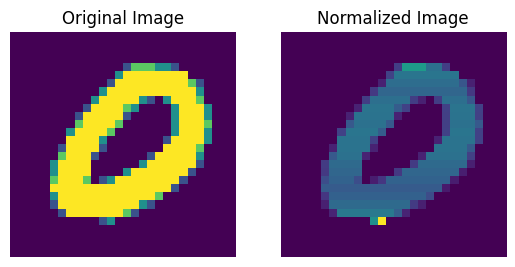

In [ ]:
# Select a random index from the training data
random_index = np.random.randint(0, len(test_images))

image = test_images[random_index]
image_og = test_images_og[random_index]
label = test_labels[random_index]

image = np.expand_dims(image, axis=0)

prediction = model_dropout.predict(image)
predicted_class = np.argmax(prediction)

predicted_class_name = classes[predicted_class]
correct_class_name = classes[int(label)]

print("Predicted class:", predicted_class_name)
print("Correct class:", correct_class_name)

plt.subplot(1, 2, 1)
plt.imshow(image_og.squeeze())
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image.squeeze())
plt.title("Normalized Image")
plt.axis('off')

plt.show()

#------------------------------------------------------------------------------------------------------------------------